In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-09-12 17:29:46.060985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757698186.241991      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757698186.297285      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, Activation

from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
)


In [5]:
train = train_datagen.flow_from_directory(
    '/kaggle/input/split-monkey-pox-dataset/Monkey split/train',
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'categorical'
)

# Data generator for validation dataset
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from the validation directory
validation = validation_datagen.flow_from_directory(
    '/kaggle/input/split-monkey-pox-dataset/Monkey split/val',
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

test = validation_datagen.flow_from_directory(
    '/kaggle/input/split-monkey-pox-dataset/Monkey split/val',
    target_size = (224, 224),
    batch_size = 128,
    shuffle = False,
    class_mode = 'categorical'
)

Found 4200 images belonging to 6 classes.
Found 900 images belonging to 6 classes.
Found 900 images belonging to 6 classes.


In [6]:
VGG16 = tf.keras.applications.VGG16(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

I0000 00:00:1757698201.417916      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
VGG16.trainable = False

In [8]:
model = tf.keras.models.Sequential([
  VGG16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=6, activation='softmax'),
])

In [9]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,933,702 (156.15 MB)

 Trainable params: 26,219,014 (100.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1757698213.304540     116 service.cc:148] XLA service 0x7b25a4001f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757698213.305373     116 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1757698213.712887     116 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1757698240.956827     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/33 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.2445 - loss: 4.4121 - val_accuracy: 0.4822 - val_loss: 1.2571
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5286 - loss: 1.1943 - val_accuracy: 0.7256 - val_loss: 0.8311
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6448 - loss: 0.9621 - val_accuracy: 0.7089 - val_loss: 0.7125
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6841 - loss: 0.8291 - val_accuracy: 0.7956 - val_loss: 0.5737
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7223 - loss: 0.7382 - val_accuracy: 0.8500 - val_loss: 0.4476
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7395 - loss: 0.6879 - val_accuracy: 0.8589 - val_loss: 0.4010
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7736 - loss: 0.6039 - val_accuracy: 0.8767 - val_loss: 0.3402
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7762 - loss: 0.5729 - val_accuracy: 0.8767 - val_loss: 0.3531
Ep

In [11]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(validation)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.9033 - loss: 0.3181
Accuracy: 0.8955555558204651
Loss: 0.3263958990573883


In [12]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['Chickenpox', 'Cowpox', 'HFMD','Healthy','Measles','Monkeypox']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step
              precision    recall  f1-score   support

  Chickenpox       0.94      0.79      0.86       150
      Cowpox       0.86      0.97      0.91       150
        HFMD       0.90      0.97      0.94       150
     Healthy       0.99      0.88      0.93       150
     Measles       0.98      0.93      0.95       150
   Monkeypox       0.75      0.84      0.79       150

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



<Axes: >

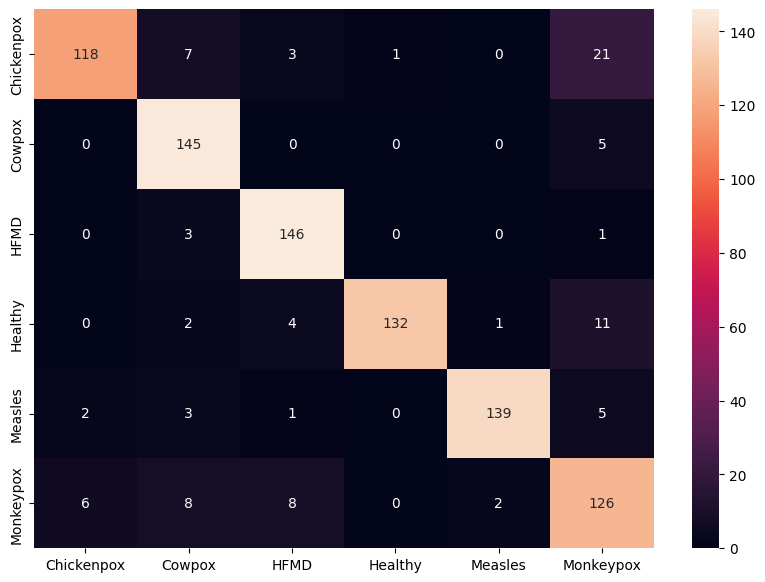

In [13]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Chickenpox', 'Cowpox', 'HFMD','Healthy','Measles','Monkeypox']],
                  columns = [i for i in ['Chickenpox', 'Cowpox', 'HFMD','Healthy','Measles','Monkeypox']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

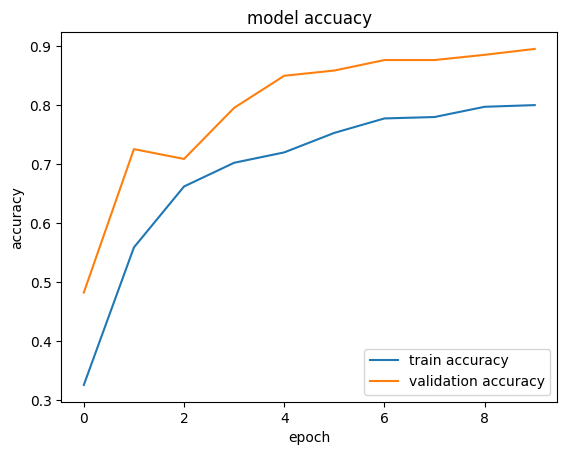

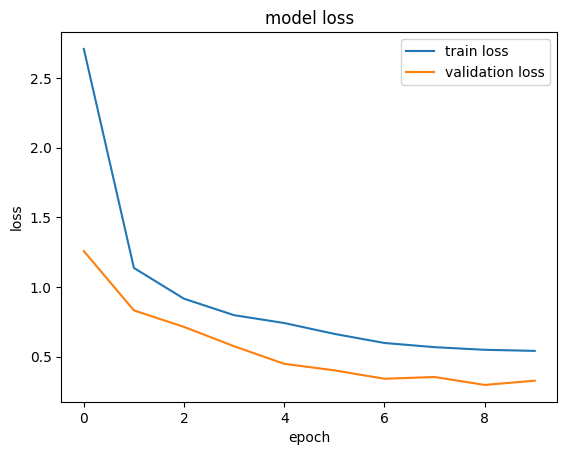

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()